# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:
1.Inisiasi jumlah kluster secara random, misalkan kita pilih k=2. K adalah sebuah parameter yang mewakilkan angka dari cluster yang data points nya akan dilakukan pengelompokan.
2.Tentukan posisi centroid secara random
3.Hitung jarak antara data point ke centroid. Assign setiap data ke centroid terdekat (hal ini akan membentuk  k clusters).Perhitungan jarak antara titik data ke centroid menggunakan formula euclidean distance. 
4.Kemudian hitung ulang centroid berdasarkan label-label data sebelumnya. Disini kita buat kembali centroid baru dan menghitung kembali jarak antar data poin ke centroid.

5.Kemudian di assign kembali data poin ke centroid terdekat yang terbaru, dan kita cek apakah ada perubahan dalam cluster atau tidak, jika ada maka kita perlu kembali ke poin 4 mencari posisi centroid yang tidak mengubah cluster. Hal ini kita lakukan perulangan sampai posisi centroid tidak berubah lagi. 




---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [3]:
#code here
#handling missing value
df = df.fillna(method='ffill')
df.isnull().sum()

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


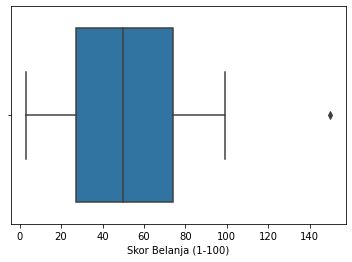

In [4]:
sns.boxplot('Skor Belanja (1-100)', data=df)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


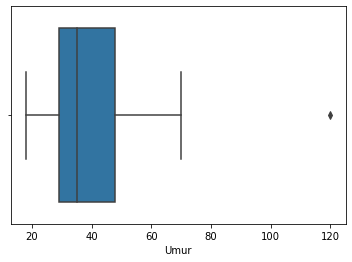

In [5]:
sns.boxplot('Umur', data=df)

In [6]:
def finding_outlier(df):
    Q1= df.quantile(0.25)
    Q3= df.quantile(0.75)
    IQR= Q3-Q1
    df_final= df[(df<(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
    return df_final

print(finding_outlier(df['Skor Belanja (1-100)']))
print(finding_outlier(df['Umur']))

0      39.0
1      81.0
2       6.0
3      77.0
4      40.0
       ... 
245    14.0
246    90.0
247    32.0
248    86.0
249    15.0
Name: Skor Belanja (1-100), Length: 249, dtype: float64
0      19.0
1      21.0
2      20.0
3      23.0
4      31.0
       ... 
244    27.0
245    59.0
246    35.0
247    37.0
248    32.0
Name: Umur, Length: 249, dtype: float64


In [7]:
def remove_outlier(df):
    Q1= df.quantile(0.25)
    Q3= df.quantile(0.75)
    IQR= Q3-Q1
    df_final= df[((df<(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR))))]
    return df_final

In [8]:
df2 = remove_outlier(df[['Skor Belanja (1-100)', 'Umur']])
df2.dropna(axis= 0, inplace= True)
df2

,Skor Belanja (1-100),Umur
0,39.0,19.0
1,81.0,21.0
2,6.0,20.0
3,77.0,23.0
4,40.0,31.0
...,...,...
244,69.0,27.0
245,14.0,59.0
246,90.0,35.0
247,32.0,37.0


In [9]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
df_sc= sc.fit_transform(df2.astype(float))

In [10]:
#Clustering

from sklearn.cluster import KMeans
kmeans1= KMeans(n_clusters= 2, random_state=42).fit(df_sc)
labels1= kmeans1.labels_


In [11]:
new_df= pd.DataFrame(data= df_sc, columns=['Skor Belanja (1-100)', 'Umur'])
new_df['label1_kmeans']= labels1
new_df

,Skor Belanja (1-100),Umur,label1_kmeans
0,-0.396407,-1.455005,0
1,1.119369,-1.304215,0
2,-1.587373,-1.379610,1
3,0.975009,-1.153425,0
4,-0.360317,-0.550263,0
...,...,...,...
243,0.686290,-0.851844,0
244,-1.298654,1.560802,1
245,1.444178,-0.248682,0
246,-0.649036,-0.097892,1


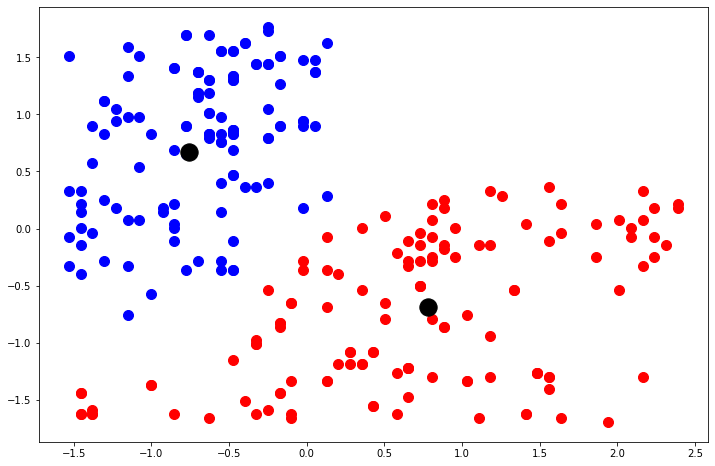

In [12]:
plt.figure(figsize= (12, 8))

plt.scatter(new_df['Umur'][new_df.label1_kmeans == 0], new_df['Skor Belanja (1-100)'][new_df.label1_kmeans == 0], c='blue', s=100)
plt.scatter(new_df['Umur'][new_df.label1_kmeans == 1], new_df['Skor Belanja (1-100)'][new_df.label1_kmeans == 1], c='red', s=100)

plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], c='k', s=300)

plt.show()

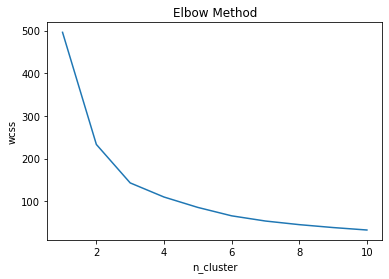

In [13]:
wcss= []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_sc)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('wcss')

plt.show()

In [14]:
kmeans2= KMeans(n_clusters= 3, init='k-means++', random_state=42).fit(df_sc)
labels2= kmeans2.labels_
labels2

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 0,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1,
       0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 0, 2])

In [15]:
new_df['label2_kmeans']= labels2
new_df

,Skor Belanja (1-100),Umur,label1_kmeans,label2_kmeans
0,-0.396407,-1.455005,0,0
1,1.119369,-1.304215,0,2
2,-1.587373,-1.379610,1,0
3,0.975009,-1.153425,0,2
4,-0.360317,-0.550263,0,0
...,...,...,...,...
243,0.686290,-0.851844,0,2
244,-1.298654,1.560802,1,1
245,1.444178,-0.248682,0,2
246,-0.649036,-0.097892,1,0


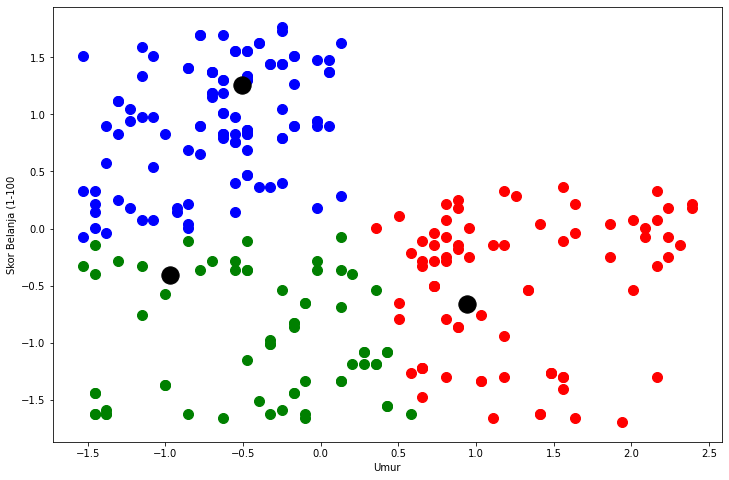

In [16]:
plt.figure(figsize= (12, 8))

plt.scatter(new_df['Umur'][new_df.label2_kmeans == 0], new_df['Skor Belanja (1-100)'][new_df.label2_kmeans == 0], c='green', s=100)
plt.scatter(new_df['Umur'][new_df.label2_kmeans == 1], new_df['Skor Belanja (1-100)'][new_df.label2_kmeans == 1], c='red', s=100)
plt.scatter(new_df['Umur'][new_df.label2_kmeans == 2], new_df['Skor Belanja (1-100)'][new_df.label2_kmeans == 2], c='blue', s=100)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], c='k', s=300)

plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100')

plt.show()

In [17]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_sc, labels=labels1))
print(silhouette_score(df_sc, labels=labels2))

0.4855515259911985
0.46586698484160377


Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:
kurang mengerti
